In [1]:
%matplotlib inline
# %matplotlib notebook

# import momepy
import shapely
import geopandas
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

ox.__version__

'1.7.0'

In [2]:
class bbox:
    def __init__(self, north,south,east,west):
        self.north=north
        self.south=south 
        self.east=east  
        self.west=west

In [3]:
# download/model a street network for some city then visualize it
# G = ox.graph_from_place("Одеса, Україна", network_type="walk")
# fig, ax = ox.plot_graph(G)


In [4]:
# ox.io.save_graphml(G, "Odessa")

In [5]:
G=ox.io.load_graphml("Odessa")

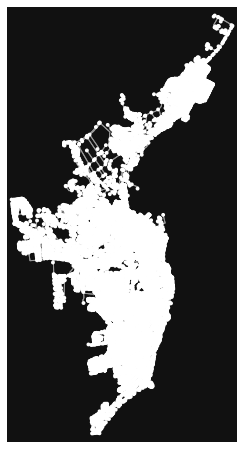

In [6]:
fig, ax = ox.plot_graph(G)

In [7]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
# gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# gdf_nodes.head()

In [8]:
# m = gdf_nodes.explore(color="skyblue", tiles="cartodbdarkmatter")
# gdf_edges.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [9]:
# gdf_edges.head()

In [10]:
# # what sized area does our network cover in square meters?
# G_proj = ox.project_graph(G)
# nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
# graph_area_m = nodes_proj.unary_union.convex_hull.area
# graph_area_m

In [11]:
# # show some basic stats about the network
# ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

In [12]:
# convert graph to line graph so edges become nodes and vice versa
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [13]:
# # color edges in original graph with closeness centralities from line graph
# ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="magma")
# fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [14]:
# # impute missing edge speeds and calculate edge travel times with the speed module
# G1 = ox.speed.add_edge_speeds(G)
# G1 = ox.speed.add_edge_travel_times(G1)

In [15]:
# # get the nearest network nodes to two lat/lng points with the distance module

# orig = ox.distance.nearest_nodes(G, X=30.73827, Y= 46.46852)
# dest = ox.distance.nearest_nodes(G, X=30.80827, Y= 46.50852)

In [16]:
# # find the shortest path between nodes, minimizing travel time, then plot it# find the shortest path between nodes, minimizing travel time, then plot it
# route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [17]:

# # how long is our route in meters?
# edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
# round(sum(edge_lengths))

In [18]:
# paek_tags = {"leisure": "park", "highway": "bus_stop"}
# place = "SoHo, New York, NY"
# gdf_park = ox.features_from_place(place, paek_tags)
# gdf_park.geometry

In [19]:

# features_list=ox.features.features_from_bbox(46.623986, 46.324014, 30.833013, 30.656398, {"tourism":["attraction","artwork"]})
# features_list.size

In [563]:
# box= bbox(north=46.488292,south=46.480293, west=30.728495, east=30.745258)
box= bbox(north=46.486292,south=46.480293, west=30.728495, east=30.745258)
# box= bbox(north=46.486292,south=46.483293, west=30.738495, east=30.745258)
# box= bbox(north=46.486292,south=46.433293,east=30.745258, west=30.698495)

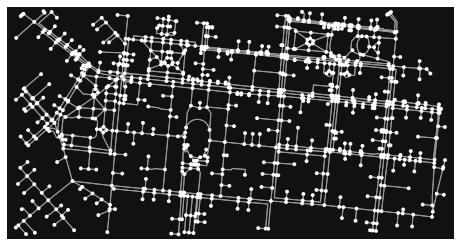

In [564]:
G_box=ox.truncate.truncate_graph_bbox(G,box.north,box.south,box.east,box.west)
# G_box=G_box.to_directed()
fig, ax = ox.plot_graph(G_box,show=False, close=False)

In [565]:
# features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":["attraction","artwork"]})
features_list_box=ox.features.features_from_bbox(box.north,box.south,box.east,box.west, {"tourism":True})
features_list_box.head()

addr:street  ... heritage
element_type osmid                             ...         
node         2112539230  Дерибасівська вулиця  ...      NaN
             2113415990                   NaN  ...      NaN
             2840964719         Садова вулиця  ...      NaN
             3101942901                   NaN  ...      NaN
             3444516264      Красний провулок  ...      NaN

[5 rows x 68 columns]

In [566]:
# features_list_box.explore()

In [567]:
features_list_box_points=features_list_box[geopandas.GeoDataFrame(map(lambda x: type(x)==shapely.geometry.point.Point, features_list_box["geometry"])).values]
features_list_box_points.head()

addr:street  ... heritage
element_type osmid                             ...         
node         2112539230  Дерибасівська вулиця  ...      NaN
             2113415990                   NaN  ...      NaN
             2840964719         Садова вулиця  ...      NaN
             3101942901                   NaN  ...      NaN
             3444516264      Красний провулок  ...      NaN

[5 rows x 68 columns]

In [568]:
# features_box_graph=momepy.gdf_to_nx(features_list_box_points, approach='primal')
# features_box_graph
# plt.plot(features_box_graph)
# plt.show()

In [569]:
features_list_box_points_x=features_list_box_points["geometry"].x.values
features_list_box_points_y=features_list_box_points["geometry"].y.values
nodes=ox.distance.nearest_nodes(G,features_list_box_points_x,features_list_box_points_y)
nodes
# nodes_g=nx.subgraph_view(G_box,lambda x: x in nodes)
# nodes_g.nodes
nodes=list(filter(lambda x: x in list(G_box.nodes),nodes))
# nodes

In [570]:
# G_nx=momepy.gdf_to_nx(G_box, approach='primal')
# G_nx

In [571]:
# path=nx.algorithms.approximation.traveling_salesman_problem(G=ox.utils_graph.get_undirected(G_box),
#                                                             nodes=nodes, method=nx.algorithms.approximation.christofides)
# len(path)

In [572]:
# ox.plot.plot_graph_route(G_box,path)

In [573]:
# route_edges = ox.utils_graph.route_to_gdf(G_box, path)
# m= features_list_box_points.explore( marker_kwds={"radius": 6})
# route_edges.explore(m=m,color="red")

In [574]:
features_list_box_points.explore( marker_kwds={"radius": 6})

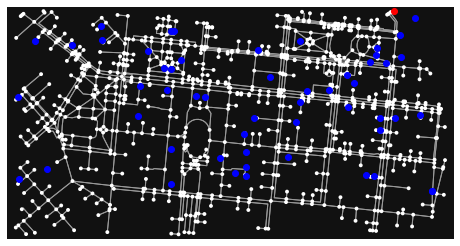

In [575]:
# origin_point_longitude= 46.481293 
# origin_point_latitude= 30.7308495

# destination_point_longitude=46.485792
# destination_point_latitude= 30.743258


origin_point_longitude= 46.453293 
origin_point_latitude= 30.708495

destination_point_longitude=46.486292
destination_point_latitude= 30.743258


# origin_point_longitude= 46.485885
# origin_point_latitude= 30.745150

# destination_point_longitude=46.436292
# destination_point_latitude= 30.703258




fig, ax = ox.plot_graph(G_box,show=False, close=False)
ax.scatter(origin_point_latitude,origin_point_longitude, c='green')
ax.scatter(destination_point_latitude,destination_point_longitude, c='red')
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [576]:
# origin=ox.distance.nearest_nodes(G_box,origin_point_longitude, origin_point_latitude)
# destination=ox.distance.nearest_nodes(G_box,destination_point_longitude, destination_point_latitude)
origin=ox.distance.nearest_nodes(G_box, origin_point_latitude,origin_point_longitude)
destination=ox.distance.nearest_nodes(G_box, destination_point_latitude,destination_point_longitude)

In [577]:
# Negative weights???????????????????????????????????????????????????????????????????????

# ADD heuristic!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
path_orig_dest_fast=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination,weight="length")
len(path_orig_dest_fast)
# path_orig_dest

57

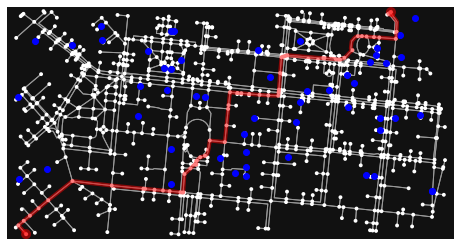

In [578]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest_fast,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [579]:
def gauss_filter(x,y,p1,p2, sigma):
    # return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))/(2*np.pi*(sigma*sigma))
    return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))

In [580]:
# def interestingness_func(feature):
#     return 1

# def get_interestingness_nodes_attributes (G1, features_list_points1):
#     attr_dict={n:{"interestingness_attr":0} for n in G1.nodes}
#     # print(attr_dict.values())
#     L=list(attr_dict.values()) 
#     for n in G1.nodes:
#         for i in range(len(features_list_points1)):
#             feature=features_list_points1.iloc[i]
#             # Better PROJECTION, NOT DEGREES !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#             dist= ox.distance.euclidean(feature.geometry.y, feature.geometry.x, G1.nodes[n]["x"], G1.nodes[n]["y"])
#             # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
#             attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]-interestingness_func(feature)*gauss_filter(G1.nodes[n]["x"],G1.nodes[n]["y"],feature.geometry.x, feature.geometry.y)/1000
#     min_attr_dict= min([L[i]["interestingness_attr"] for i in range(len(L))])
#     # print(min_attr_dict)
#     for n in G1.nodes:
#         attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+abs(min_attr_dict)
#     return attr_dict

In [581]:
def attribute_value_func(point):
    return 1

# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=6, k_local=1e3,k_wide=0,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=0,k_wide=1e1,default_value=0,improving_attr=True):
# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=0.0001, sigma_wide=0.0005, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):

# def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e1,k_wide=1e0,default_value=0,improving_attr=True):
def get_nodes_attributes (G1, points1,name_attr1:str,sigma_local=1e-4, sigma_wide=1e-3, k_local=1e2,k_wide=1e1,default_value=0,improving_attr=True):
    attr_dict={n:{name_attr1:default_value} for n in G1.nodes}
    # print(attr_dict.values())
    for n in G1.nodes:
        for i in range(len(points1)):
            point=points1.iloc[i]
            point_x=point.geometry.x
            point_y=point.geometry.y
            # dist= dist_euclidean(d_point,n)
            # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
            addition_value=attribute_value_func(point)*(gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_local)*k_local
                                    +gauss_filter(point_x,point_y, G1.nodes[n]["x"], G1.nodes[n]["y"],sigma_wide)*k_wide)
            if improving_attr:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]-addition_value
            else:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+addition_value
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])       
        # print(abs(min_attr_dict))
    # print(min_attr_dict)
    # if improving_attr:
        for n in G1.nodes:
            attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+abs(min_attr_dict)
    return attr_dict

In [582]:
# minimizing "non-interestigness"
# interestingness_attr=get_interestingness_nodes_attributes(G_box,features_list_box_points)
interestingness_attr=get_nodes_attributes(G_box,features_list_box_points,"interestingness_attr")
nx.set_node_attributes(G_box,interestingness_attr)
# G_box.nodes[10980542]

In [583]:
# bb=nx.betweenness_centrality(G_box)
# nx.set_node_attributes(G_box,bb,'betweenness')
# G_box.nodes[10980542]

In [584]:
[G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]

[167.2599991169996,
 148.27391778025748,
 122.71292234116416,
 164.0150392043614,
 154.0687475052427,
 134.605936407142,
 135.9793721212094,
 116.820617572591,
 106.77140009089571,
 112.05316434372881,
 134.47283299592053,
 148.7132451967436,
 155.871151272092,
 127.93869764540318,
 144.02338504095633,
 152.7979021180464,
 131.85967194092427,
 101.05972973715994,
 153.2634053772682,
 100.99139512144191,
 95.74996938061484,
 139.06430833285415,
 115.67088285090963,
 135.30844359103446,
 156.68996152925584,
 158.43494538289292,
 169.58928155182258,
 162.38344372788615,
 160.12909048877546,
 159.60764077331854,
 160.57772088369148,
 147.34063541676002,
 136.18306001895266,
 162.92774845594872,
 168.6417985864252,
 151.23451915508502,
 122.00929348929792,
 150.68561911280491,
 146.37351103627418,
 130.95308912685454,
 141.1996808581453,
 139.63120350134463,
 141.20548938449045,
 142.91332661191555,
 138.49034905017763,
 118.21489188575032,
 48.35897300130702,
 104.2608164235658,
 104.32594

In [585]:
max([G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes])

169.58928155182258

In [586]:
# G_box.edges[(10980542, 4439629602, 0)]

In [587]:
# G_box[10980542][4439629602]

In [588]:
# def get_interestingness_edges_attributes(G1,k_length=0.5,k_inter=0.5):
#     attr_dict={edge:{"interestingness_attr_edge":0} for edge in G1.edges}
#     for edge in G1.edges:
#         attr_dict[edge]["interestingness_attr_edge"]=G1.nodes[edge[1]]["interestingness_attr"]*k_inter+k_length*G1.edges[edge]["length"]
#     return attr_dict

def get_edges_attributes(G1,name_attr1,k_length=0.2,k_attr=0.8,improving_attr=True):
# def get_edges_attributes(G1,name_attr1,k_length=0,k_attr=1,improving_attr=True):
    attr_dict={edge:{name_attr1:0} for edge in G1.edges}
    for edge in G1.edges:
        # IF DIGRAF
        
        attr_dict[edge][name_attr1]=k_length*G1.edges[edge]["length"]
        # IF NOT DIRECTED GRAF:
        # max_val=max(G1.nodes[edge[1]]["danger_attr"],G1.nodes[edge[0]]["danger_attr"])
        # attr_dict[edge][name_attr1]=max_val*k_attr+k_length*G1.edges[edge]["length"]
        if improving_attr:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]-G1.nodes[edge[1]]["interestingness_attr"]*k_attr
        else:
          attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]+G1.nodes[edge[1]]["interestingness_attr"]*k_attr
          # attr_dict[edge][name_attr1]=  ((attr_dict[edge][name_attr1])**(1/2))*G1.nodes[edge[1]]["interestingness_attr"]*k_attr
          # attr_dict[edge][name_attr1]=  attr_dict[edge][name_attr1]*(1+G1.nodes[edge[1]]["interestingness_attr"]*k_attr)
            

    
    L=list(attr_dict.values())
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])
        for edge in G1.edges:
            attr_dict[edge][name_attr1]=attr_dict[edge][name_attr1]+abs(min_attr_dict)
    return attr_dict
    

In [589]:
# interestingness_attr_edge=get_interestingness_edges_attributes(G_box)
interestingness_attr_edge=get_edges_attributes(G_box,"weight",improving_attr=False)
nx.set_edge_attributes(G_box,interestingness_attr_edge)
# G_box.edges[(10980542, 4439629602, 0)]

In [590]:
[G_box.edges[e]["weight"] for e in G_box.edges]

[146.47243886914018,
 146.2584164642738,
 153.944398764759,
 140.1791387956461,
 146.05308160719005,
 120.25490650863216,
 121.19061975961199,
 134.31237144592708,
 101.48624621351446,
 105.97399302054293,
 99.3926007132978,
 111.49873046194472,
 138.0325229988623,
 136.8276181268221,
 138.5078051541292,
 125.2863698375757,
 126.03198711551737,
 125.42420426886598,
 135.1626670289756,
 109.90447879541341,
 109.03815769527813,
 107.97272449788206,
 108.77960477546593,
 109.59071951306271,
 109.46715832671559,
 108.47594063768665,
 110.60740217597073,
 110.0355121174474,
 109.03333231250511,
 126.39679830984954,
 93.91479805863818,
 93.18759855947937,
 115.74329649354007,
 89.76299571199861,
 95.52297130744464,
 86.37705930443204,
 85.5907524553396,
 92.1460714716674,
 90.40263078802062,
 90.63440305423363,
 90.4899538523159,
 111.37067271110341,
 112.19181048951263,
 117.83842477881653,
 122.20052445837929,
 119.87358925260236,
 126.067017386232,
 128.88729529024394,
 133.10823267867224

In [591]:
def dist_euclidean(a, b):
    x1=G_box.nodes[a]["x"]
    x2=G_box.nodes[b]["x"]
    y1= G_box.nodes[a]["y"]
    y2=G_box.nodes[b]["y"]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    # return 0

In [592]:
# path_orig_dest=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination,heuristic=dist_euclidean, weight="interestingness_attr")
path_orig_dest=nx.algorithms.shortest_paths.astar_path(G_box,origin,destination, weight="weight",heuristic=dist_euclidean)
len(path_orig_dest)

41

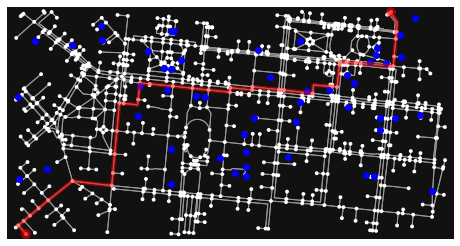

In [593]:
fig, ax = ox.plot.plot_graph_route(G_box,path_orig_dest,show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='blue')
plt.show()

In [594]:
#TODO 
# Consider distance
# heuristic
# minus interestingness

nodes_coord=ox.utils_graph.graph_to_gdfs(G_box, edges=False, node_geometry=False)[["x", "y"]]
nodes_coord.head()

,x,y
osmid,,
10980542,30.732246,46.481606
10980543,30.738449,46.481192
10980544,30.738646,46.482631
10980545,30.740532,46.481082
27128847,30.742624,46.480927


In [595]:
# inter_nodes=[G_box.nodes[n]["interestingness_attr"] for n in G_box.nodes]
# inter_nodes

In [596]:
# # from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()

# # ax = Axes3D(fig)

# ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(nodes_coord["x"].values, nodes_coord["y"].values, inter_nodes, label='interestingness')
# ax.set_title("3D plot")
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')
# ax.set_zlabel('z-axis')
# plt.show()

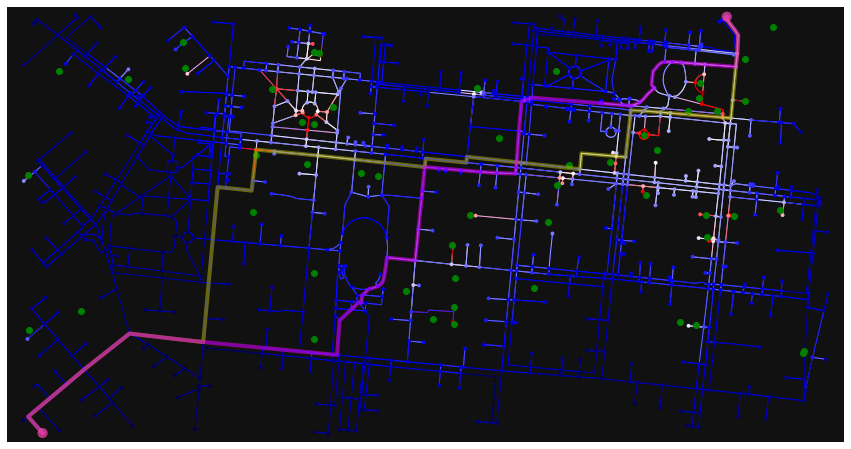

(<Figure size 1080x1080 with 1 Axes>, <Axes: >)

In [607]:
# colormap=plt.cm.seismic
# plt.colorbar(sm)


fig, ax = ox.plot.plot_graph(G_box,
                             node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic_r'),
                   edge_color=ox.plot.get_edge_colors_by_attr(G_box, "weight",cmap='seismic_r'),
                             figsize=(15,15),show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='g')

# colormap=plt.cm.seismic
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# plt.colorbar(sm,ax=ax)
# fig.set_facecolor('#161616')

ox.plot.plot_graph_route(G_box,path_orig_dest,route_color="y",ax=ax,show=False, close=False)
ox.plot.plot_graph_route(G_box,path_orig_dest_fast,route_color="magenta",ax=ax)

In [598]:
# path_orig_dest_edges=[(path_orig_dest[i],path_orig_dest[i+1])for i in range(len(path_orig_dest)-1)]

In [599]:
# from matplotlib.pyplot import figure

# # figure(figsize=(15, 15), dpi=80)
# fig, ax = plt.subplots()
# fig.set_size_inches(13,15)
# # fig.set_dpi(100)

# pos = nx.kamada_kawai_layout(G_box)
# colormap=plt.cm.seismic
# # nx.draw(G, pos=pos, node_color="red",node_size=4,edge_cmap=plt.cm.seismic, width=list(nx.get_edge_attributes(G,'danger_attr_edge').values()))
# nx.draw(G_box, pos=pos, cmap=colormap,node_color=list(nx.get_node_attributes(G_box,'interestingness_attr').values()),node_size=10,
#         edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G_box,'interestingness_attr_edge').values()),width=2)
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# # plt.colorbar(sm)
# fig.set_facecolor('#161616')
# nx.draw_networkx_nodes(G_box,pos=pos,nodelist=[origin,destination],node_color=["g","r"],node_size=30)
# nx.draw_networkx_edges(G_box,pos=pos,edgelist=path_orig_dest_edges,edge_color = "y",width=5)


In [603]:
path_circular=nx.algorithms.approximation.traveling_salesman_problem(G=G_box, weight="weight",
                                                            nodes=nodes[0:1]+nodes[12:17], method=nx.algorithms.approximation.asadpour_atsp,
                                                                     cycle=False)
                                                            # nodes=nodes[0:1]+nodes[12:17], method=nx.algorithms.approximation.asadpour_atsp)
# len(path_circular)

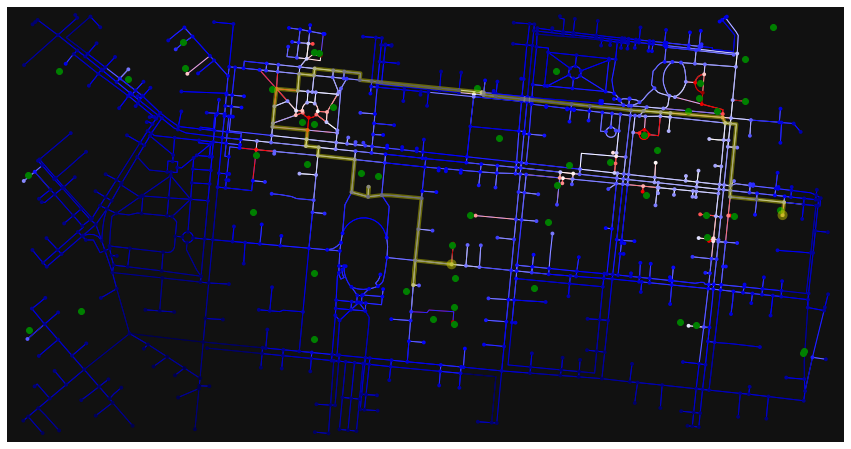

(<Figure size 1080x1080 with 1 Axes>, <Axes: >)

In [608]:
fig, ax = ox.plot.plot_graph(G_box,
                             node_color=ox.plot.get_node_colors_by_attr(G_box,"interestingness_attr",cmap='seismic_r'),
                   edge_color=ox.plot.get_edge_colors_by_attr(G_box, "weight",cmap='seismic_r'),
                             figsize=(15,15),show=False, close=False)
ax.scatter(features_list_box_points_x,features_list_box_points_y, c='g')

# colormap=plt.cm.seismic
# sm = plt.cm.ScalarMappable(cmap=colormap)
# sm._A = []
# plt.colorbar(sm,ax=ax)
# fig.set_facecolor('#161616')

ox.plot.plot_graph_route(G_box,path_circular,route_color="y",ax=ax)